In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression,Lasso,Ridge
import statsmodels.api as sm
import joblib
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler


df = pd.read_csv("data/raw/data.csv",delimiter=",")
df.head(10)

,app_id,ssn,zip_code,income,homeownership,purchases,credit_limit,fico,num_late,past_def,num_bankruptcy,avg_income,density,log_odds_utils
0,102227.0,123817237.0,49020.0,47000.0,1,3097.157200,3100.0,816.0,0.0,0.0,0.0,65643.445731,66.125196,1.000459
1,109792.0,589049197.0,61116.0,71000.0,0,13689.566804,24300.0,687.0,0.0,0.0,0.0,44187.707868,2.130877,1.314213
2,110171.0,322099062.0,77562.0,38000.0,1,6774.730206,15200.0,721.0,0.0,0.0,0.0,64654.498978,3.797031,1.457883
3,113087.0,848114225.0,15985.0,68000.0,1,8895.214327,25200.0,560.0,1.0,0.0,0.0,63213.225412,835.790919,1.609437
4,116110.0,946986483.0,73654.0,58000.0,0,12339.389402,35900.0,638.0,0.0,0.0,0.0,62494.798662,73.185241,1.627253
5,117545.0,732362644.0,27254.0,57000.0,1,6178.679988,30100.0,424.0,3.0,2.0,2.0,42112.878114,192.364758,1.992405
6,117842.0,857967307.0,62324.0,67000.0,1,1318.850065,9800.0,822.0,1.0,0.0,0.0,86774.997077,62.131138,2.317504
7,118829.0,940510013.0,90482.0,67000.0,1,2548.662400,28600.0,670.0,0.0,0.0,0.0,73598.451854,6.655360,2.654381
8,119386.0,457562709.0,67996.0,58000.0,0,11401.532787,34000.0,536.0,2.0,0.0,0.0,61283.936220,1353.042953,1.643865
9,120053.0,705107138.0,97818.0,55000.0,1,4684.551276,10000.0,832.0,3.0,0.0,0.0,84687.455208,388.263441,1.426625


In [2]:
# checking for null values

print(f'Null Values: {df.isnull().sum()}')
print(f'dtypes: {df.dtypes}')
print(f'Unique Values: {df.nunique()}')
print(f'duplicated values: {df.duplicated().sum()}')

Null Values: app_id            0
ssn               0
zip_code          0
income            0
homeownership     0
purchases         0
credit_limit      0
fico              0
num_late          0
past_def          0
num_bankruptcy    0
avg_income        0
density           0
log_odds_utils    0
dtype: int64
dtypes: app_id            float64
ssn               float64
zip_code          float64
income            float64
homeownership       int64
purchases         float64
credit_limit      float64
fico              float64
num_late          float64
past_def          float64
num_bankruptcy    float64
avg_income        float64
density           float64
log_odds_utils    float64
dtype: object
Unique Values: app_id            500
ssn               500
zip_code          500
income            106
homeownership       2
purchases         500
credit_limit      257
fico              292
num_late            6
past_def            5
num_bankruptcy      4
avg_income        500
density           500
log_odd

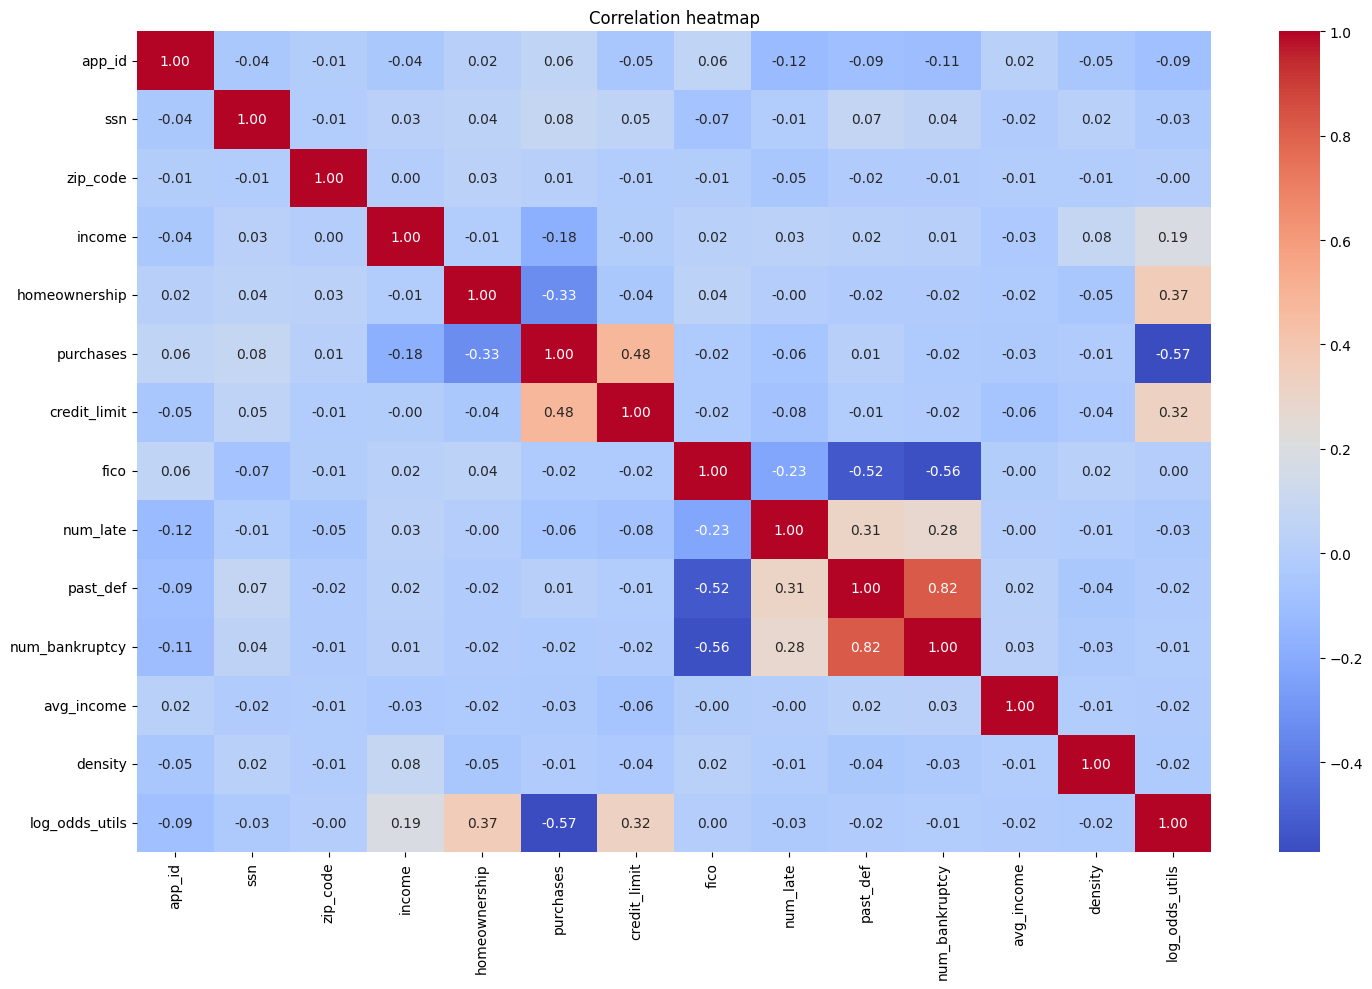

In [3]:
# correlation heatmap

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,fmt=".2f",cmap="coolwarm")
plt.title("Correlation heatmap")
plt.tight_layout()
plt.savefig("images/correlation-heatmap.png")
plt.show()

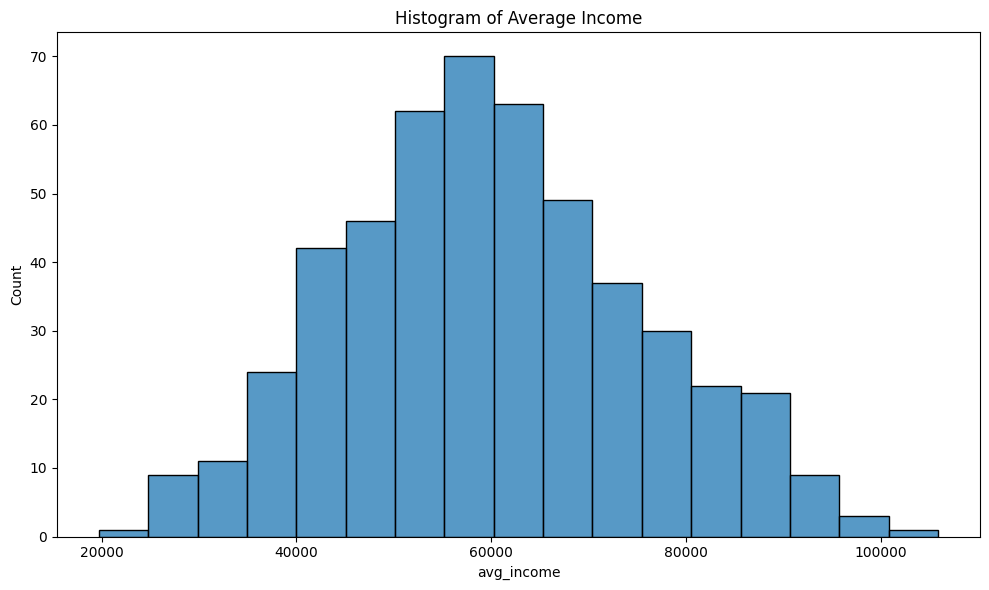

In [4]:
# histogram of average income
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='avg_income')
plt.title("Histogram of Average Income")
plt.savefig("images/hisogram-of-average-income.png")
plt.tight_layout()
plt.show()

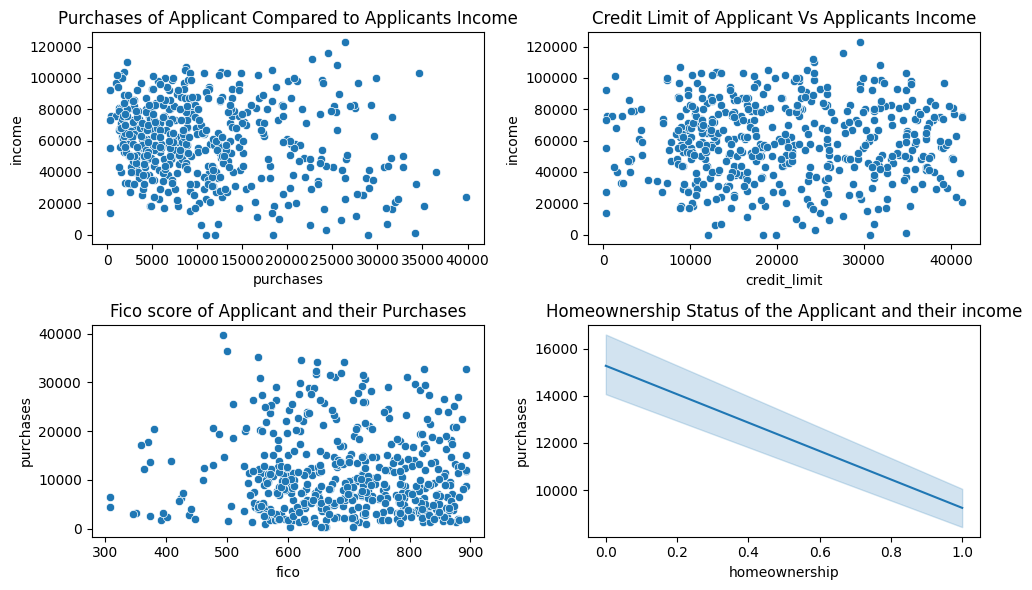

In [5]:

fig,axs = plt.subplots(2,2,figsize=(10,6))
sns.scatterplot(data=df,ax=axs[0,0],x='purchases',y='income')
axs[0,0].set_title("Purchases of Applicant Compared to Applicants Income")

sns.scatterplot(data=df,ax=axs[0,1],x='credit_limit',y='income')
axs[0,1].set_title("Credit Limit of Applicant Vs Applicants Income")

sns.scatterplot(data=df,ax=axs[1,0],x='fico',y='purchases')
axs[1,0].set_title("Fico score of Applicant and their Purchases")


sns.lineplot(data=df,ax=axs[1,1],x='homeownership',y='purchases')
axs[1,1].set_title("Homeownership Status of the Applicant and their income")
plt.tight_layout()
plt.show()

Purchases increase when the applicant owns a home

In [6]:
## ols
X = df.drop('log_odds_utils',axis=1)
y = df['log_odds_utils']

ols_model=  sm.OLS(exog=sm.add_constant(X),endog=y).fit()
print(f'Anova table: {ols_model.summary()}')


Anova table:                             OLS Regression Results                            
Dep. Variable:         log_odds_utils   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     149.6
Date:                Sun, 05 Oct 2025   Prob (F-statistic):          1.91e-160
Time:                        15:53:30   Log-Likelihood:                 6.4239
No. Observations:                 500   AIC:                             15.15
Df Residuals:                     486   BIC:                             74.16
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.2340      

Purchases and Credit Limit have the biggest statistical significance on wether or not
and individual gains utility from all of the features


In [7]:
# training
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=42)

sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)


def evaluate(y_test,pred,r2,mse,cv_scores,model_name):
    results = {
        "Model":model_name,
        "R2 Score":r2,
        "Mean Squared Error":mse,
        "Cross-Validation Score":cv_scores.mean()
        }
    return results



models = {
    "linearregression":LinearRegression(),
    "lasso":Lasso(),
    "ridge":Ridge(),
    "gradient boost":GradientBoostingRegressor(),
    "Random Forest": RandomForestRegressor(),
    "svr": SVR(),
    "xgb": XGBRegressor()

    }

#list to store results

results = []

for model_name,model in models.items():
    model.fit(X_train_scaled,y_train)
    pred = model.predict(X_test_scaled)
    r2 = r2_score(y_test,pred)
    mse = mean_squared_error(y_test,pred)
    cv_scores = cross_val_score(model,X,y,cv=10,scoring="neg_mean_squared_error").mean()
    print(f'Model Name: {model_name}; R2 score: {r2*100:.2f}%')
    print(f'Model Name: {model_name}; Mean Squared Error Score: {mse:.4}')
    print(f'Model Name: {model_name}; Results from 10-Fold Cross-Validation: {cv_scores}')
    results.append(evaluate(y_test,pred,r2,mse,cv_scores,model_name))
    

Model Name: linearregression; R2 score: 77.77%
Model Name: linearregression; Mean Squared Error Score: 0.05653
Model Name: linearregression; Results from 10-Fold Cross-Validation: -0.060535503046180925
Model Name: lasso; R2 score: -6.07%
Model Name: lasso; Mean Squared Error Score: 0.2697
Model Name: lasso; Results from 10-Fold Cross-Validation: -0.062425139022474554
Model Name: ridge; R2 score: 77.78%
Model Name: ridge; Mean Squared Error Score: 0.05649
Model Name: ridge; Results from 10-Fold Cross-Validation: -0.06052052303823996


/home/nickkats1/sklearn_only/utilization/venv/lib/python3.12/site-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=4.53441e-19): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/home/nickkats1/sklearn_only/utilization/venv/lib/python3.12/site-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=5.95936e-19): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/home/nickkats1/sklearn_only/utilization/venv/lib/python3.12/site-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=6.05755e-19): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/home/nickkats1/sklearn_only/utilization/venv/lib/python3.12/site-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=5.98144e-19): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/home/nickkats1/sklearn_only/utilization/venv/lib/python3.12/site-packages/s

Model Name: gradient boost; R2 score: 98.69%
Model Name: gradient boost; Mean Squared Error Score: 0.003342
Model Name: gradient boost; Results from 10-Fold Cross-Validation: -0.0037235766835862364
Model Name: Random Forest; R2 score: 98.67%
Model Name: Random Forest; Mean Squared Error Score: 0.003379
Model Name: Random Forest; Results from 10-Fold Cross-Validation: -0.004280354584392886
Model Name: svr; R2 score: 87.97%
Model Name: svr; Mean Squared Error Score: 0.0306
Model Name: svr; Results from 10-Fold Cross-Validation: -0.3296157515841593
Model Name: xgb; R2 score: 98.48%
Model Name: xgb; Mean Squared Error Score: 0.003857
Model Name: xgb; Results from 10-Fold Cross-Validation: -0.004152650954050442


              Model  R2 Score  Mean Squared Error  Cross-Validation Score
3    gradient boost  0.986858            0.003342               -0.003724
4     Random Forest  0.986711            0.003379               -0.004280
6               xgb  0.984830            0.003857               -0.004153
5               svr  0.879673            0.030597               -0.329616
2             ridge  0.777840            0.056491               -0.060521
0  linearregression  0.777689            0.056529               -0.060536
1             lasso -0.060663            0.269707               -0.062425


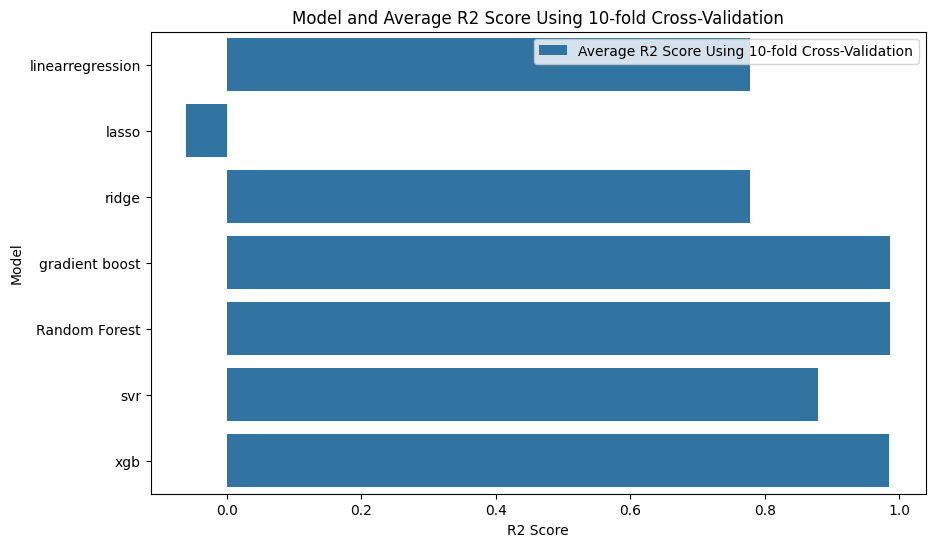

In [8]:
# results dataframe
df_results = pd.DataFrame(results)
print(df_results.sort_values(by="R2 Score",ascending=False))
plt.figure(figsize=(10,6))
sns.barplot(x=df_results['R2 Score'],y=df_results['Model'],label="Average R2 Score Using 10-fold Cross-Validation")
plt.title("Model and Average R2 Score Using 10-fold Cross-Validation")
plt.legend()
plt.show()

